In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
data = pd.read_csv("Datasets/Ads_CTR_Optimisation.csv")

In [3]:
#Random Selection
N = 10000
d = 10
sum = 0
selections = []
for n in range(N):
    ad = random.randrange(d)
    selections.append(ad)
    award = data.values[n,ad]
    sum = sum + award
sum

1306

(array([ 972.,  987., 1022., 1030.,  949., 1046.,  975.,  995., 1004.,
        1020.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

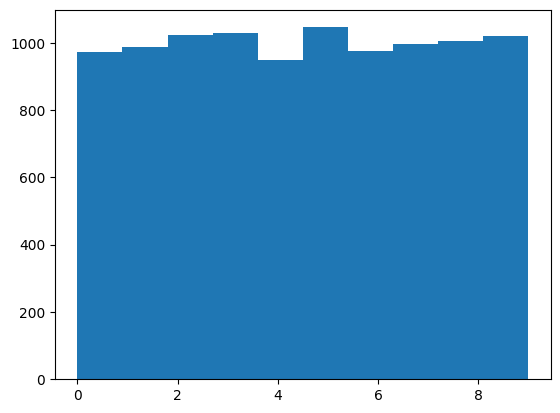

In [4]:
plt.hist(selections)

In [5]:
#UCB
awards = [0] * d
clicks = [0] * d
sum= 0
selections_ = []
for n in range(N):
    ad = 0
    maxUcb = 0
    for i in range(d):
        if clicks [i] > 0:
            mean = awards[i] / clicks[i]
            delta = math.sqrt(3/2 * math.log(n) / clicks[i])
            ucb = mean + delta
        else : 
            ucb= 100000 
        if maxUcb < ucb:
            maxUcb = ucb
            ad = i
    selections_.append(ad)
    award = data.values[n,ad]
    clicks[ad] += 1
    awards[ad] += award
    sum = sum + award
sum

2211

(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

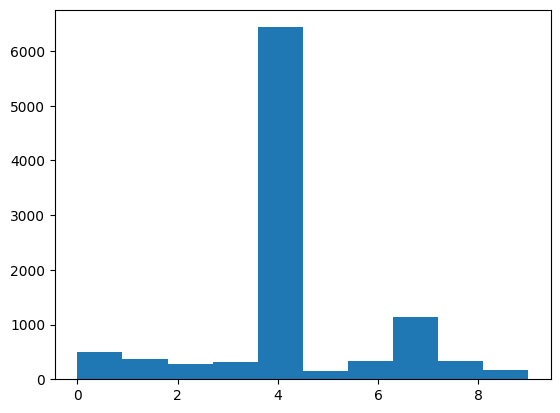

In [6]:
plt.hist(selections_)

In [7]:
#Thompson Sampling
sum= 0
selections__ = []
ones = [0] * d
zeros = [0] * d
for n in range(N):
    ad = 0
    maxTs = 0
    for i in range(d):
        randbeta = random.betavariate(ones[i] + 1 , zeros[i] + 1)
        if randbeta > maxTs:
            maxTs = randbeta
            ad = i
    selections__.append(ad)
    award = data.values[n,ad]
    if award == 1:
        ones[ad] += 1
    else:
        zeros[ad] += 1
    sum = sum + award
sum

2591

(array([ 210.,  131.,   46.,   76., 9195.,   31.,   30.,  167.,   69.,
          45.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

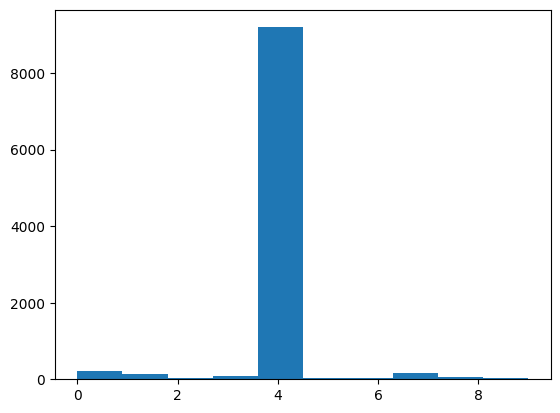

In [20]:
plt.hist(selections__)